In [1]:
# --------------------------
# 1. Import Libraries
# --------------------------
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# --------------------------
# 2. Load and Explore Data
# --------------------------
resume_data = pd.read_csv('Resume/Resume.csv')
print("Data Sample:")
display(resume_data.head())

Data Sample:


,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [4]:
# --------------------------
# 3. Text Preprocessing
# --------------------------
def clean_resume_text(text):
    """Cleans and normalizes resume text data."""
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Keep only alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Lemmatize and remove stopwords
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    cleaned_words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(cleaned_words)

In [ ]:
# Apply preprocessing
resume_data['cleaned_resume'] = resume_data['Resume_str'].apply(clean_resume_text)

In [6]:
# --------------------------
# 4. Feature Engineering (TF-IDF)
# --------------------------
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(resume_data['cleaned_resume'])
y = resume_data['Category']

In [7]:
# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# --------------------------
# 5. Model Training & Evaluation
# --------------------------
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [9]:
# Train and evaluate each model
model_performance = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    model_performance[model_name] = accuracy
    print(f"{model_name}: {accuracy:.2%} Accuracy")

# Identify best model
best_model_name = max(model_performance, key=model_performance.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} ({model_performance[best_model_name]:.2%})")


Logistic Regression: 63.98% Accuracy
Support Vector Machine: 62.37% Accuracy
Random Forest: 68.21% Accuracy

Best Model: Random Forest (68.21%)


In [10]:
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, best_model.predict(X_test)))


Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       0.77      0.93      0.84        29
              ADVOCATE       0.91      0.70      0.79        30
           AGRICULTURE       0.00      0.00      0.00         8
               APPAREL       0.71      0.50      0.59        20
                  ARTS       0.57      0.22      0.32        18
            AUTOMOBILE       0.00      0.00      0.00         6
              AVIATION       0.82      0.86      0.84        21
               BANKING       0.68      0.65      0.67        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.72      0.48      0.58        27
                  CHEF       0.78      0.75      0.77        24
          CONSTRUCTION       0.86      0.91      0.89        34
            CONSULTANT       0.58      0.35      0.44        20
              DESIGNER       0.74      0.89      0.81        19
         DIGITA

c:\Users\MSI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MSI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MSI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

C:\Users\MSI\AppData\Local\Temp\ipykernel_14704\1412672830.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_performance.keys()), y=list(model_performance.values()), palette="viridis")


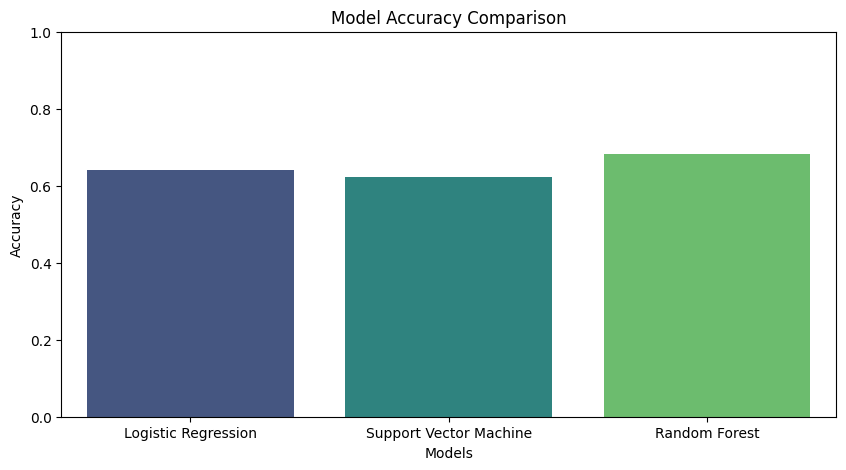

In [11]:
# --------------------------
# 6. Visualizations
# --------------------------
# Model Comparison Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=list(model_performance.keys()), y=list(model_performance.values()), palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.show()

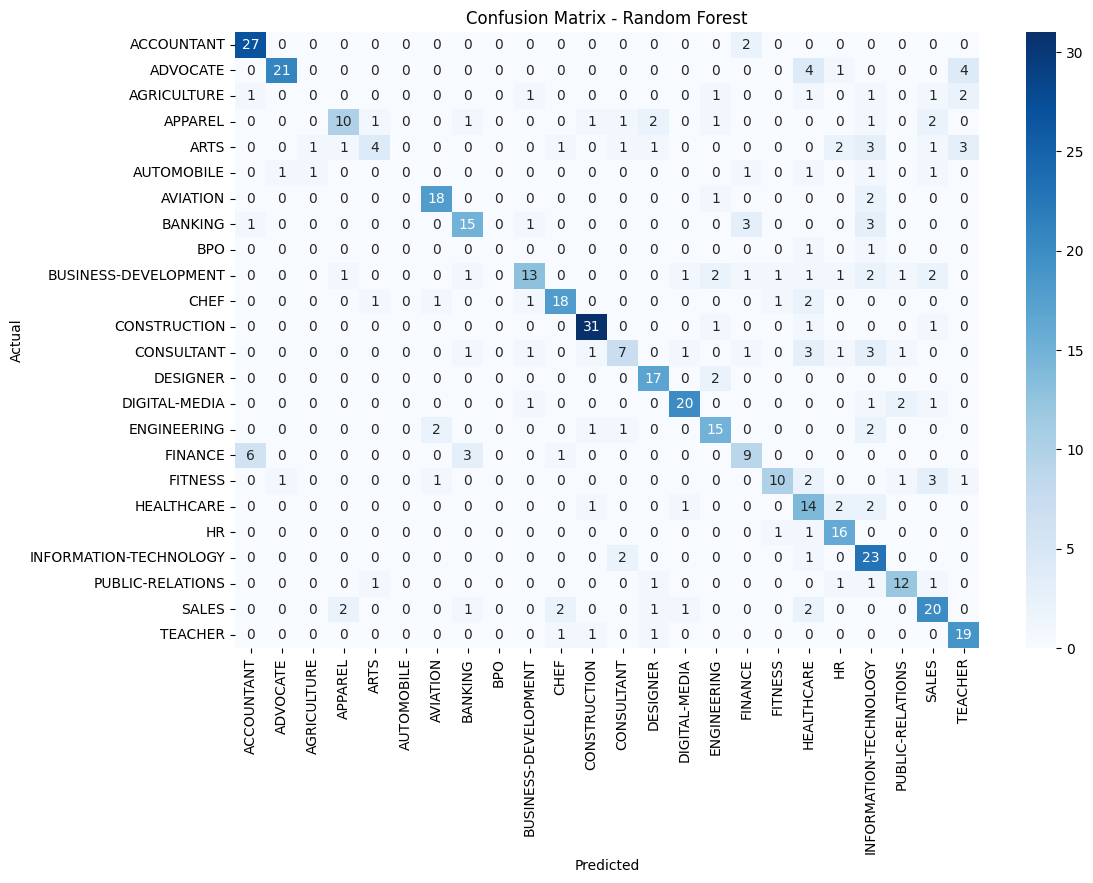

In [12]:
# Confusion Matrix
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, best_model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=best_model.classes_, 
            yticklabels=best_model.classes_)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [13]:
# --------------------------
# 7. Save Models & Vectorizer
# --------------------------
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(best_model, 'best_model.pkl')
print("\nModels saved successfully!")


Models saved successfully!
